## (25) Graphviz

In [1]:
#graphviz 버전 확인
import graphviz
graphviz.version()

# Digraph: 방향이 있는 그래프
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
# comment는 source code에 적힌다.
dot

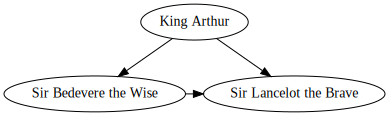

In [5]:
# Node생성
from graphviz import *

# dot = Digraph(comment='The Round Table')
dot = Digraph()
dot

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

# edge(화살표)생성
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint = 'false') 
# dot.edge('BL', constraint = 'false') : 이렇게 edge()에서는 처음과 끝을 한번에 같이 적어주면 안된다.
dot

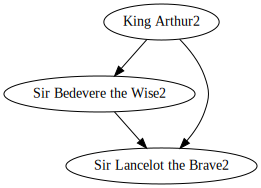

In [4]:
from graphviz import *

dot = Digraph(comment='The Round Table')
dot

# Node생성
dot.node('C', 'King Arthur2')
dot.node('D', 'Sir Bedevere the Wise2')
dot.node('E', 'Sir Lancelot the Brave2')

# edge(화살표)생성
dot.edges(['CD', 'CE'])
# dot.edge('D', 'E', constraint = 'false') 
# constraint(제한) = 'true'하면 dot.edges(['CD', 'CE'])는 제약조건 없고 아랫줄에 나온 코드만 제약조건 있는 것임
dot.edge('D', 'E', constraint = 'true') 
# 제약조건이 있으면 rank가 생겨서 wise2가 상위 rank, brave2가 하위rank인 것 처럼 표현됨
dot

In [ ]:
print(dot.source)

In [ ]:
dot.render('test-output/round-table.gv', view=True)
# 기본workspace에 test-output폴더가 생기고 그안에 round-table.gv파일이 생성되고, pdf파일도 생성된다.다.
# view = True해주면 pdf파일이 바로 열린다.

In [ ]:
# jpyter notebook에서도 쓸 수 있다는 예제
import graphviz as gv
d=gv.Digraph()
d.edge('hello', 'world') # 이런경우 노드를 만들어 준 적이 없지만 알아서 노드만들고 edge를 이어준다.
d

In [ ]:
import graphviz
graph1 = graphviz.Graph(comment = 'This is a undirected graph')
graph2 = Digraph(comment = 'This is a directed graph')
graph1
graph2

In [ ]:
import graphviz

ps = Digraph(name = 'pet-shop', node_attr={'shape': 'plaintext'})

ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead', label='바보')

ps

In [ ]:
import graphviz

ps = Digraph(name = 'pet-shop', node_attr={'shape': 'plaintext'})

ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead')

# ps만든 후 편집하기(edit)
ps.graph_attr['rankdir'] = 'LR' #rankdir(랭크방향 default=위에서 아래)를 좌에서 우로 바꾼다는얘기
ps.edge_attr.update(arrowhead='vee', arrowsize = '2')
ps

### Graph, Digraph Class methods

In [ ]:
#import graphviz
from graphviz import *
ni = Graph('ni')

ni.attr('node', shape = 'rarrow') # node의 모양을 우측화살표로 한다는 뜻
ni.node('1', 'Ni!')
ni.node('2', 'Scene!')
ni.node('3', 'Kim!', shape = 'egg')

ni.attr('node', shape = 'star') # node의 모양을 default를 star로 한다는 뜻
ni.node('4', 'Heal')
ni.node('5', 'Hate')

ni.attr(rankdir='LR')
ni.edges(['12', '23', '34', '45'])
ni

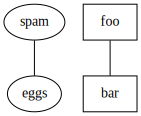

In [6]:
from graphviz import *

p = Graph(name='parent')
p.edge('spam', 'eggs')

c = Graph(name = 'child', node_attr={'shape' : 'box'})
c.edge('foo', 'bar')

p.subgraph(c)
p

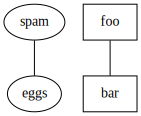

In [7]:
# 위에 코드와 동일한 결과가 나온다.
from graphviz import *

p = Graph(name = 'parent')
p.edge('spam', 'eggs')

with p.subgraph(name = 'child', node_attr = {'shape' : 'box'}) as c:
    c.edge('foo', 'bar')
    
p

In [ ]:
from graphviz import *

dot = Graph(comment = 'The Round Table', format = 'jpg')
#dot.format='jpg' 이렇게 해줘도 된다.

dot = Graph(comment = 'The')

### Graphviz Code Example

In [9]:
# 직접으로 손으로 한번 그려보자
# Example1
from graphviz import *


g = Graph('G', filename='gviz/process.gv', engine = 'sfdp')

g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g.edge('run', 'kernel')
g.edge('kernel', 'zombie')
g.edge('kernel', 'sleep')
g.edge('kernel', 'runmem')
g.edge('sleep', 'swap')
g.edge('swap', 'runswap')
g.edge('runswap', 'new')
g.edge('runswap', 'runmem')
g.edge('new', 'runmem')
g.edge('sleep', 'runmem')

g.render(view = True)
# g.view() : 이렇게 해도 새창띄워서 볼 수 있다.

'gviz/process.gv.pdf'

In [ ]:
# Example 2
from graphviz import *

f = Digraph('finite_state_machine', filename = 'gviz/fsm.gv')
f.attr(rankdir='LR', size ='8, 5')

f.attr('node', shape = 'doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape = 'circle')
f.edge('LR_0', 'LR_2', label = 'SS(B)')
f.edge('LR_0', 'LR_1', label = 'SS(S)')
f.edge('LR_1', 'LR_3', label = 'SS($end)')
f.edge('LR_2', 'LR_6', label = 'SS(b)')
f.edge('LR_2', 'LR_5', label = 'SS(a)')
f.edge('LR_2', 'LR_4', label = 'S(A)')
f.edge('LR_5', 'LR_7', label = 'S(b)')
f.edge('LR_5', 'LR_5', label = 'S(a)')
f.edge('LR_6', 'LR_6', label = 'S(b)')
f.edge('LR_6', 'LR_5', label = 'S(a)')
f.edge('LR_7', 'LR_8', label = 'S(b)')
f.edge('LR_7', 'LR_5', label = 'S(a)')
f.edge('LR_8', 'LR_6', label = 'S(b)')
f.edge('LR_8', 'LR_5', label = 'S(a)')

f.view()

In [ ]:
# Example 3

from graphviz import *

e = Graph('ER', filename = 'gviz/er.gv', engine = 'neato')

e.attr('node', shape = 'box')
e.node('course')
e.node('institute')
e.node('student')

e.attr('node', shape = 'ellipse') # elipse : 타원을 뜻함
e.node('name0', label = 'name')
e.node('name1', label = 'name')
e.node('name2', label = 'name')
e.node('code')
e.node('grade')
e.node('number')

e.attr('node', shape = 'diamond', style = 'filled', color = 'lightgrey')
e.node('C-I')
e.node('S-C')
e.node('S-I')

e.edge('name0', 'course')
e.edge('code', 'course')
e.edge('course', 'C-I', label = 'n', len='1.00')
e.edge('C-I', 'institute', label = '1', len='1.00')
e.edge('institute', 'name1')
e.edge('institute', 'S-I', label= '1', len='1.00')
e.edge('S-I', 'student', label = 'n', len = '1.00')
e.edge('student', 'grade')
e.edge('student', 'name2')
e.edge('student', 'number')
e.edge('student', 'S-C', label='m', len='1.00')
e.edge('S-C', 'course', label = 'n', len = '1.00')

e.attr(label=r'\n\nEntity Relation Diagram\ndrawn by NEATO')
e.attr(fontsize = '20')
e.view()

In [ ]:
# Example 4

from graphviz import *

g = Digraph('g', filename = 'gviz/btree.gv', node_attr={'shape' : 'record', 'height' : '.1'})

#알파벳들은 Key값이다
g.node('node0', '<f0> |<f1> G|<f2> ') 
g.node('node1', '<f0> |<f1> E|<f2> ')
g.node('node2', '<f0> |<f1> B|<f2> ')
g.node('node3', '<f0> |<f1> F|<f2> ')
g.node('node4', '<f0> |<f1> R|<f2> ')
g.node('node5', '<f0> |<f1> H|<f2> ')
g.node('node6', '<f0> |<f1> Y|<f2> ')
g.node('node7', '<f0> |<f1> A|<f2> ')
g.node('node8', '<f0> |<f1> C|<f2> ')

# Node_0 포인터 설정 
g.edge('node0:f2', 'node4:f1') # Node_0의 L_pointer → Node_4의 key값
g.edge('node0:f0', 'node1:f1') # Node_0의 R_pointer → Node_1의 key값
# Node_0 포인터 설정 
g.edge('node1:f0', 'node2:f1') # Node_1의 L_pointer → Node_2의 key값
g.edge('node1:f2', 'node3:f1') # Node_1의 R_pointer → Node_3의 key값
# Node_0 포인터 설정 
g.edge('node2:f2', 'node8:f1') # Node_2의 L_pointer → Node_8의 key값
g.edge('node2:f0', 'node7:f1') # Node_2의 R_pointer → Node_7의 key값
# Node_0 포인터 설정 
g.edge('node4:f2', 'node6:f1') # Node_4의 L_pointer → Node_6의 key값
g.edge('node4:f0', 'node5:f1') # Node_4의 R_pointer → Node_5의 key값

g.view()

In [2]:
# Example 5

from graphviz import Digraph

s = Digraph('structs', filename = 'gviz/structs_revisited.gv', node_attr={'shape': 'record'})

s.node('struct1', '<f0> left | <f1> middle | <f2> right')
s.node('struct2', '<f0> one | <f1> two')
s.node('struct3', r'hello\nworld |{ b |{c|<here> d|e}| f}| g | h')

s.edges([('struct1:f1', 'struct2:f0'), ('struct1:f2', 'struct3:here')]) #here를 <here>로 써줘도 정상작동함
#here를 b나 h로 적어주면 struct3전체를 가리킴
s.view()

'gviz/structs_revisited.gv.pdf'

In [11]:
# Example 6

from graphviz import *

g = Graph('G', filename = 'gviz/fdpclust.gv', engine = 'fdp')

g.node('e')

with g.subgraph(name='clusterA') as a:
    a.edge('a','b')
    a.attr(label = 'clusterA', color='blue') #with문 내에 label을 넣어줘야하고 color도 추가할 수 있다.
    #a의 color정해주면 c의 color도 바뀐다.
    with a.subgraph(name='clusterC') as c:
        c.edge('C', 'D')
        c.attr(label = 'clusterC')
with g.subgraph(name='clusterB') as b:
    b.edge('d', 'f')
    b.attr(label = 'clusterB')
a.attr()
    
g.edge('d', 'D')
g.edge('e', 'clusterB')
g.edge('clusterC', 'clusterB')

g.view()

'gviz/fdpclust.gv.pdf'

In [ ]:
# Example 7
from graphviz import *

g = Digraph('G', filename = 'gviz/cluster.gv')

with g.subgraph(name='cluster_0') as c:
    c.attr(style = 'filled', color = 'lightgrey', label='process #1')
    c.node_attr.update(style='filled', color = 'white')
    c.edges([('a0','a1'), ('a1', 'a2'), ('a2', 'a3')])

with g.subgraph(name='cluster_1') as c:
    c.attr(label='process #2', color = 'blue')
    c.node_attr.update(style='filled')
    c.edges([('b0', 'b1'), ('b1', 'b2'),('b2', 'b3')])

g.node('start', shape='Mdiamond')
g.node('end', shape = 'Msquare')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.view()  

### 과제(Graphviz Module)

In [1]:
# png format

from graphviz import *

engineList=['dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo']
for i in engineList:
    g = Digraph('G', filename="by engine/ %s.gv" % i,  engine = i, format = 'png',\
                node_attr={'color': 'goldenrod2', 'style' : 'filled', 'size' : '7.5'})

    g.edge('7th Edition', '32V')
    g.edge('7th Edition', 'V7M')
    g.edge('7th Edition', 'Xenix')
    g.edge('7th Edition', 'UniPlus+')
    g.edge('8th Edition', '9th Edition')
    g.edge('1 BSD', '2 BSD')
    g.edge('2 BSD', '2.8 BSD')
    g.edge('2.8 BSD', 'Ultrix-11')
    g.edge('2.8 BSD', '2.9BSD')
    g.edge('32V', '3 BSD')
    g.edge('3 BSD', '4 BSD')
    g.edge('4 BSD', '4.1 BSD')
    g.edge('4.1 BSD', '4.2 BSD')
    g.edge('4.1 BSD', '2.8 BSD')
    g.edge('4.1 BSD', '8th Edition')
    g.edge('4.2 BSD', '4.3 BSD')
    g.edge('4.2 BSD', 'Ultrix-32')
    g.view()

In [2]:
# pdf format

from graphviz import *

engineList=['dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo']
for i in engineList:
    g = Digraph('G', filename="by engine/ %s.gv" % i,  engine = i,\
                node_attr={'color': 'goldenrod2', 'style' : 'filled', 'size' : '7.5'})

    g.edge('7th Edition', '32V')
    g.edge('7th Edition', 'V7M')
    g.edge('7th Edition', 'Xenix')
    g.edge('7th Edition', 'UniPlus+')
    g.edge('8th Edition', '9th Edition')
    g.edge('1 BSD', '2 BSD')
    g.edge('2 BSD', '2.8 BSD')
    g.edge('2.8 BSD', 'Ultrix-11')
    g.edge('2.8 BSD', '2.9BSD')
    g.edge('32V', '3 BSD')
    g.edge('3 BSD', '4 BSD')
    g.edge('4 BSD', '4.1 BSD')
    g.edge('4.1 BSD', '4.2 BSD')
    g.edge('4.1 BSD', '2.8 BSD')
    g.edge('4.1 BSD', '8th Edition')
    g.edge('4.2 BSD', '4.3 BSD')
    g.edge('4.2 BSD', 'Ultrix-32')
    g.view()